# Road Traffic Vehicle Counting Exam

In this exam, you will use the YOLO (You Only Look Once) object detection model to analyze a video of road traffic. Your primary task is to count the number of vehicles exiting the road at each of the four exits (located at the top, bottom, left, and right of the frame). The video for this task is provided at `Datasets/YOLO_Exam_Video.mp4`.

## Objectives
- Load and process the video using OpenCV.
- Utilize the YOLO model to detect vehicles in each frame.
- Manipulate the video frames using OpenCV.
- Track vehicles as they move across the video frames.
- Count the number of vehicles exiting via the top street.
- Count the number of vehicles exiting via the bottom street.
- Count the number of vehicles exiting via the left street.
- Count the number of vehicles exiting via the right street.


## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [1]:
!pip install ultralytics
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.3/872.3 kB 8.7 MB/s eta 0:00:00


In [2]:
import gdown
import cv2
from ultralytics import YOLO

In [3]:
file_id='13ws_eIxq21ghdZF_Rgh2NRA5Hdasf30O'
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "/content/input_video.mp4"

gdown.download(url,output_path,quiet=False)

print(f"download successfully here{output_path}")

Downloading...
From: https://drive.google.com/uc?id=13ws_eIxq21ghdZF_Rgh2NRA5Hdasf30O
To: /content/input_video.mp4
100%|██████████| 13.1M/13.1M [00:00<00:00, 91.0MB/s]

download successfully here/content/input_video.mp4


## Load the YOLO Model

You will first need to load the YOLO model, there is a custom model for this exam called `YOLO_Model.pt` under Datasets file ⚠️ PLEASE USE THIS MODEL AND DO NOT USE ANY OTHER MODEL ⚠️.
Write the code to load the YOLO model below:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
model_path='/content/drive/MyDrive/T5/yolo ocr/YOLO_Model.pt'
model=YOLO(model_path)

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

In [6]:
video_path='/content/input_video.mp4'
cap=cv2.VideoCapture(video_path)

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [7]:
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps=int(cap.get(cv2.CAP_PROP_FPS))

In [8]:
height

1080

In [9]:
width

1920

In [10]:
fps

29

## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes, specified Region of Interest rectangle (ROI) and the counted vehicles on each sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [11]:
output_path='/content/output_video.mp4'
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

In [12]:
color = (0, 255, 0)
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX

In [13]:
color1 = (255, 255, 0)
thickness1 =3
font1 = cv2.FONT_HERSHEY_SIMPLEX

## Expermint to get the `(x1, y1, x2, y2)` of the ROI

### Hint
When defining the Regions of Interest (ROIs) for detecting vehicles exiting the road, consider the coordinates that outline the relevant areas. These coordinates can be specified as `(x1, y1, x2, y2)`, where `(x1, y1)` is the top-left corner and `(x2, y2)` is the bottom-right corner of the rectangle.

Experiment with different coordinates to accurately cover the streets where vehicles exit. Visualize these ROIs by drawing rectangles on a frame of the video and adjust the coordinates as needed until you capture the desired areas effectively.

In [14]:
ret, frame = cap.read()

results = model(frame)


0: 384x640 2 buss, 90 cars, 2 trucks, 2 vans, 288.2ms
Speed: 43.0ms preprocess, 288.2ms inference, 1379.6ms postprocess per image at shape (1, 3, 384, 640)


In [15]:
results[0].boxes.xyxy.cpu().numpy()

array([[     1867.5,      78.181,      1900.9,      141.14],
       [     1834.7,      213.16,      1880.3,      286.11],
       [     1089.7,      990.52,      1128.7,      1078.9],
       [     1648.6,      652.61,      1708.1,      678.95],
       [     1079.3,      540.23,      1112.9,      605.48],
       [     747.51,      149.75,      774.52,      199.58],
       [     1036.8,      641.58,      1093.1,      684.04],
       [     218.92,      583.67,      283.12,      615.22],
       [     783.14,      570.54,      818.55,      622.83],
       [     784.91,      30.246,      812.11,      89.437],
       [      987.1,      493.33,        1031,      541.92],
       [     751.93,      62.438,      776.86,      122.86],
       [     15.652,      519.12,      75.527,      547.52],
       [     54.013,      384.41,      115.83,      414.02],
       [     691.07,      391.86,      746.06,      421.88],
       [     750.36,       549.3,      785.11,      599.71],
       [     1764.8,    

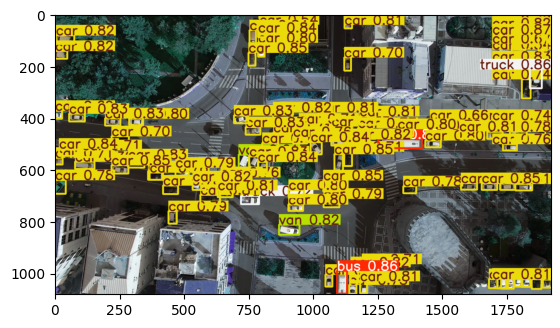

In [16]:
import matplotlib.pyplot as plt

annotated_frame = results[0].plot()

plt.imshow(annotated_frame)
plt.show()

## Process Video Frames and Identify Vehicles Left the Road Form Each Street

For each frame in the video, use the YOLO model to detect and track vehicles. You will need to write a loop that processes each frame and applies the YOLO model.

In each frame, after detecting the vehicles, determine whether they exited the road via the top, bottom, left, or right street. You can use the positions of the bounding boxes provided by YOLO to do this.

- The video should display bounding boxes around the detected objects.
- The video should display your name on the top.
- It should display the calculated center of each vehicle.
- The video should display the confidence score, alongside the object ID and class ID of each detected and tracked object.
- The video should display the rectangles representing the regions where you count the vehicles that have crossed and exited.
- The video should display the number of vehicles that exited via the top street.
- The video should display the number of vehicles that exited via the bottom street.
- The video should display the number of vehicles that exited via the left street.
- The video should display the number of vehicles that exited via the right street.

In [17]:
#height=1080
#width=1920

top_street=set()
bottom_street=set()
left_street=set()
right_street=set()

def intersection(center,id):#function to see based on intersection will count car by using lenght and width

  xcenter,ycenter=center#assigned x and y to the center

  vid_hight=1080#take it from a cv2 hight
  vid_width=1920#take it from a cv2 width

  #calculate center of hight and width:
  x_center=vid_hight//2
  y_center=vid_width//2

  #assign condition if ycenter is less than y_center based on width will be top
  if ycenter < y_center:
    top_street.add(str(id))
  #assign condition if ycenter is larger than y_center based on width will be bottom
  elif ycenter> y_center:
    bottom_street.add(str(id))

  #assign condition if xcenter is less than x_center based on hight will be left
  if xcenter < x_center:
    left_street.add(str(id))

  #assign condition if xcenter is larger than x_center based on hight will be right
  elif xcenter > x_center:
    right_street.add(str(id))

In [18]:
ret= True

while ret:
  ret,frame=cap.read()
  if not ret:
    break


  results = model.track(frame,persist=True)


  for result in results:
    for obj in result.boxes:

      bbox = obj.xyxy[0].cpu().numpy()


      class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1


      conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0


      id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1


      x1, y1, x2, y2 = map(int, bbox)


      cv2.rectangle(frame, (x1,y1), (x2,y2), color,thickness)


      label1=f"wejdan Awaji class A1"

      label2=f"Class: {class_id} ID: {id} Confidence: {conf}"

      label3=f"car from the top street:  {len(left_street)} car from the bottom street: {len(bottom_street)} car from left street: {len(left_street)} car from right street: {len(right_street)}"




      xcenter=(x1+x2)//2
      ycenter=(y1+y2)//2
      center=(xcenter,ycenter)
      intersection(center,id)


      cv2.putText(frame,label1,(30,height-30) ,font1 ,0.5,color1,thickness1,cv2.LINE_AA)
      cv2.putText(frame,label2,(x1,y1-10) ,font1 ,0.5,color,thickness,cv2.LINE_AA)
      cv2.putText(frame,label3,(10,height-10) ,font ,0.5,color,thickness ,cv2.LINE_AA)





    out.write(frame)

cap.release()
out.release()

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.5s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 62.9ms
Speed: 3.1ms preprocess, 62.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 62.9ms
Speed: 2.9ms preprocess, 62.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 63.0ms
Speed: 5.5ms preprocess, 63.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 buss, 82 cars, 2 trucks, 2 vans, 62.9ms
Speed: 3.0ms prepr

## Save and Submit Your Work

Submit both the notebook and the output video